In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# importing dataset
advert = pd.read_csv('Advertising.csv')

# view first 5 entries
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# viewing rows and columns details
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# getting columns in dataset
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
# Removing the index column
advert.drop(['Unnamed: 0'], axis=1, inplace=True)
# axis 1 for column, inplace=True to modify original dataset

In [6]:
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


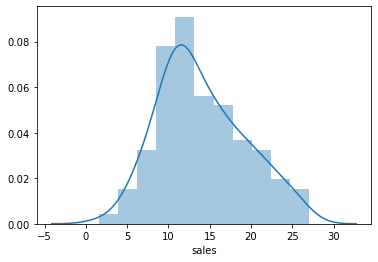

In [7]:
# Exploratory Data Analysis
import seaborn as sns
sns.distplot(advert.sales)
# distribution is normal

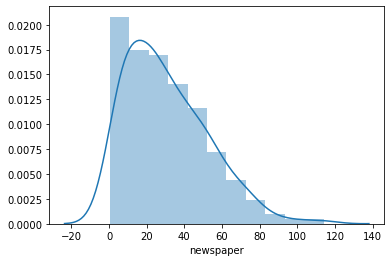

In [8]:
sns.distplot(advert.newspaper)
# distribution is skewed to the right

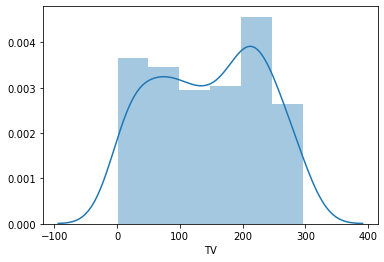

In [9]:
sns.distplot(advert.TV)
# distribution is uniform

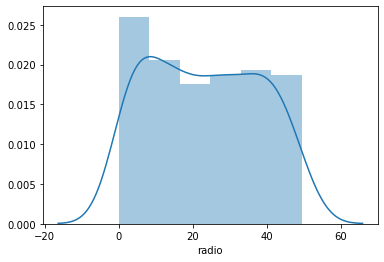

In [10]:
sns.distplot(advert.radio)
# distribution is uniform

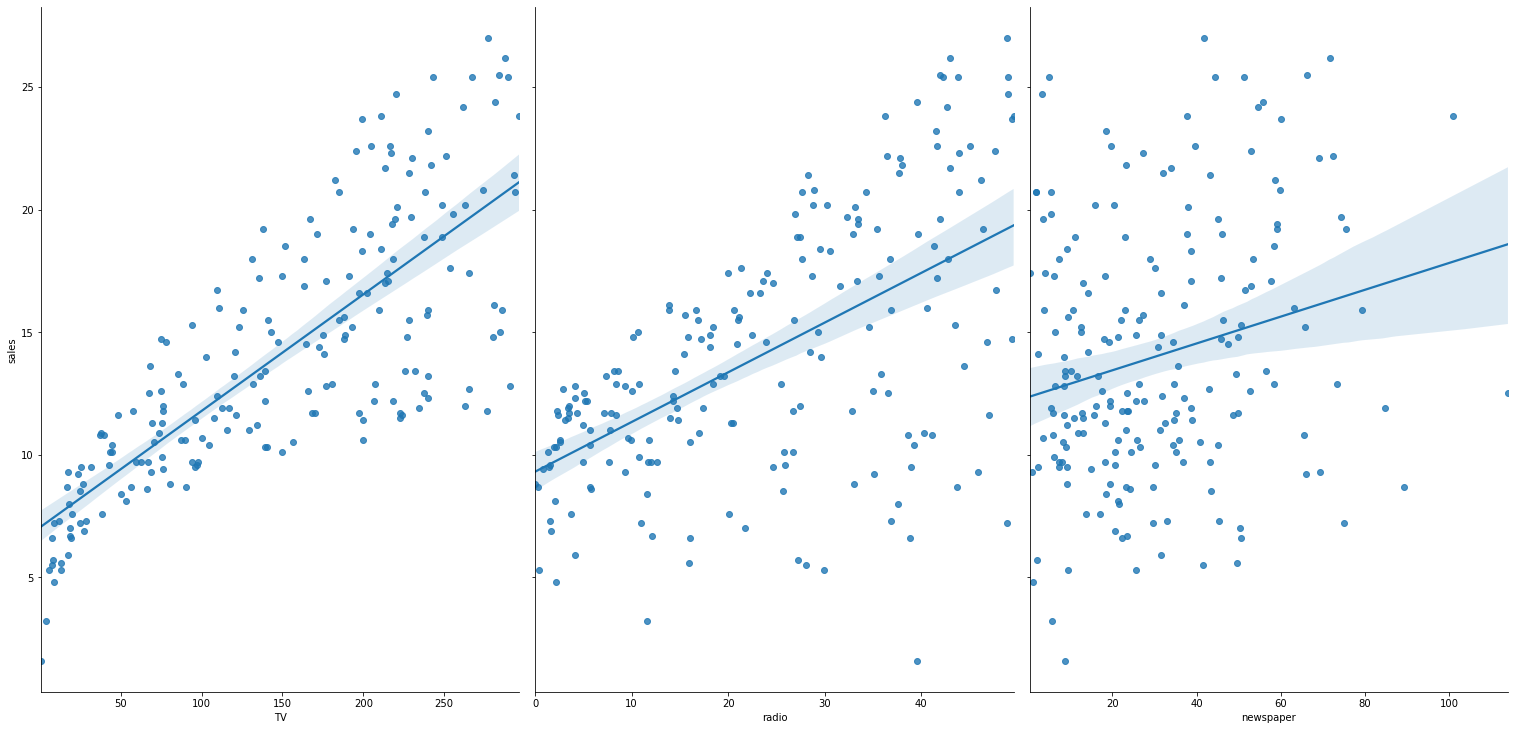

In [11]:
# Exploring relationship between Predictors and Response
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'],
            y_vars='sales', height=10, aspect=0.7, kind='reg')

In [12]:
# check sns.pairplot documentation
help(sns.pairplot)

In [13]:
# checking Pearson correlation between TV and sales
advert.TV.corr(advert.sales)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

0.7822244248616064

In [14]:
# checking correlation of all columns
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


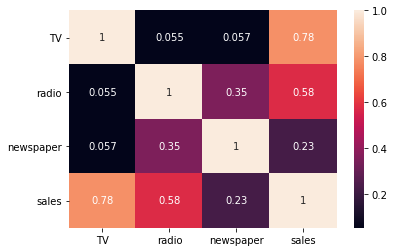

In [15]:
# Visualizing correlation using seaborn heatmap
sns.heatmap(advert.corr(), annot=True)
# annot=True will show the correlation coefficient

In [16]:
# Creating a Simple Linear Regression Model
# using TV and sales only
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
# checking the data type of X
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [18]:
# checking the no of row and columns we are working with
print(X.shape)

(200, 1)


In [19]:
# Setting target variable/response
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [20]:
# Splitting Dataset into Train & Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)

In [21]:
print(X_train.shape)

(150, 1)


In [22]:
print(y_train.shape)

(150,)


In [23]:
print(X_test.shape)

(50, 1)


In [24]:
print(y_test.shape)

(50,)


In [25]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# Interpreting Model Coefficients
print(linreg.coef_)  # model coefficient value
print(linreg.intercept_)  # model intercept value

[0.04802945]
6.91197261886872


In [27]:
# Making Predictions with Model
y_pred = linreg.predict(X_test)

In [28]:
# viewing the first 5 predictions
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

In [29]:
# Model Evaluation
from sklearn import metrics

# Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

2.4643080986027908


In [30]:
# Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

10.310069587813155


In [31]:
# Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
